In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data
test = pd.read_csv('/test_questions.csv')
train = pd.read_csv('/train_revised.csv')
test.head()

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  
0            49  
1            11  
2            11  
3            11  
4            11

In [3]:
train.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49

## **Data preprocessing and feature engineering**


**Reasoning**:
Examine the data types of each column in both the `train` and `test` dataframes, convert `travel_date` to datetime objects, and extract day of the week, month, hour, and minute from `travel_date` and `travel_time`. Also, create a 'route' feature.



In [4]:
#Examine the data types of each column in train df
print("Train DataFrame Info:")
train.info()

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [5]:
#Examine the data types of each column in test df
print("\nTest DataFrame Info:")
test.info()


Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ride_id       1111 non-null   int64 
 1   travel_date   1111 non-null   object
 2   travel_time   1111 non-null   object
 3   travel_from   1111 non-null   object
 4   travel_to     1111 non-null   object
 5   car_type      1111 non-null   object
 6   max_capacity  1111 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 60.9+ KB


In [6]:
# Convert travel_date to datetime objects
train['travel_date'] = pd.to_datetime(train['travel_date'])
test['travel_date'] = pd.to_datetime(test['travel_date'])

In [7]:
# Extract day of the week, month, hour, and minute from travel_date and travel_time
train['day_of_week'] = train['travel_date'].dt.dayofweek
test['day_of_week'] = test['travel_date'].dt.dayofweek

train['month'] = train['travel_date'].dt.month
test['month'] = test['travel_date'].dt.month

train['hour'] = train['travel_time'].apply(lambda x: int(x.split(':')[0]))
test['hour'] = test['travel_time'].apply(lambda x: int(x.split(':')[0]))

train['minute'] = train['travel_time'].apply(lambda x: int(x.split(':')[1]))
test['minute'] = test['travel_time'].apply(lambda x: int(x.split(':')[1]))


In [8]:
# Create a 'route' feature
train['route'] = train['travel_from'] + '_' + train['travel_to']
test['route'] = test['travel_from'] + '_' + test['travel_to']

In [9]:
print("\nTrain DataFrame after feature engineering:")
train.head()


Train DataFrame after feature engineering:


ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO  2017-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE  2017-11-19        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O  2017-11-26        7:05   
3     5777         19A          Mpesa      SGP18CL0ME  2017-11-27        7:10   
4     5778         11A          Mpesa      BM97HFRGL9  2017-11-27        7:12   

  travel_from travel_to car_type  max_capacity  day_of_week  month  hour  \
0      Migori   Nairobi      Bus            49            1     10     7   
1      Migori   Nairobi      Bus            49            6     11     7   
2      Keroka   Nairobi      Bus            49            6     11     7   
3    Homa Bay   Nairobi      Bus            49            0     11     7   
4      Migori   Nairobi      Bus            49            0     11     7   

   minute             route  
0      15    Migori_Nairobi  
1      12    Migori_Nairobi  
2       5    Keroka_Nairobi  
3      10  Homa Bay_Nairobi  
4      12    Migori_Nairobi

In [10]:
print("\nTest DataFrame after feature engineering:")
test.head()


Test DataFrame after feature engineering:


ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  day_of_week  month  hour  minute          route  
0            49            0      5     7       6  Kisii_Nairobi  
1            11            6      5    11       8  Kisii_Nairobi  
2            11            4      5     5       0  Kisii_Nairobi  
3            11            4      5     9      10  Kisii_Nairobi  
4            11            4      5     9      20  Kisii_Nairobi

In [11]:
# Check for missing values in train df
print("Missing values in Train DataFrame:")
print(train.isnull().sum())

Missing values in Train DataFrame:
ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
day_of_week        0
month              0
hour               0
minute             0
route              0
dtype: int64


In [12]:
print("\nMissing values in Test DataFrame:")
print(test.isnull().sum())


Missing values in Test DataFrame:
ride_id         0
travel_date     0
travel_time     0
travel_from     0
travel_to       0
car_type        0
max_capacity    0
day_of_week     0
month           0
hour            0
minute          0
route           0
dtype: int64


## **Exploratory Data Analysis (EDA)**



**Reasoning**:
Examine the distribution of 'day_of_week', 'month', 'hour', 'travel_from', and 'travel_to' features in the training data using count plots as requested in instructions 1-5. For 'travel_from', display the top 10 most frequent origins. For 'travel_to', since there is only one destination, a count plot is not very informative, but I will still generate it as requested.



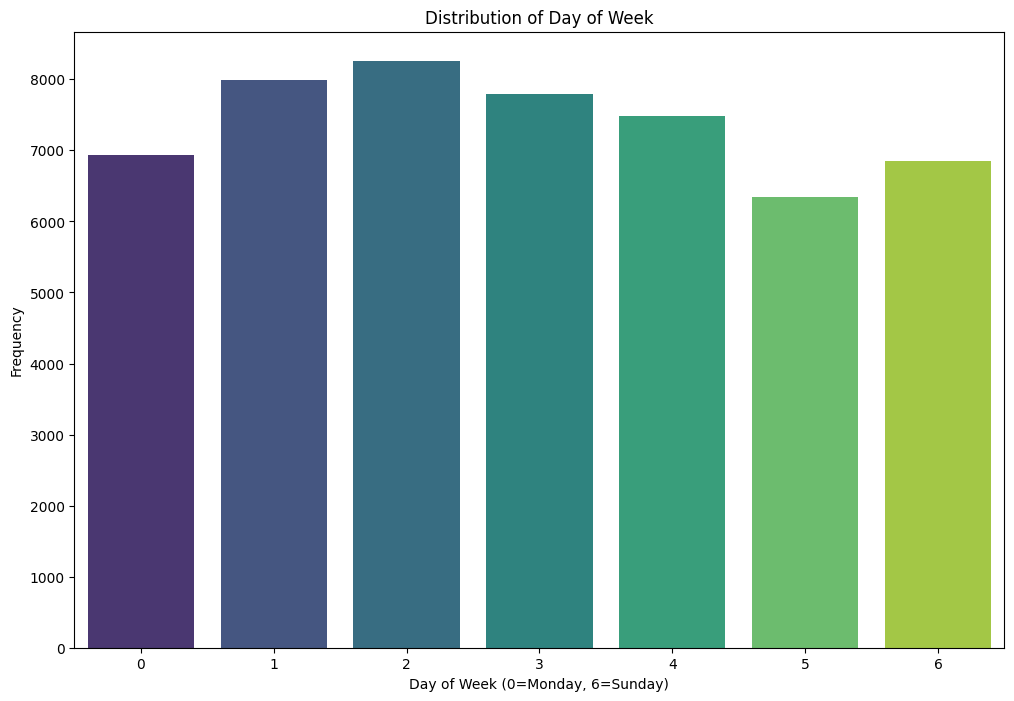

In [13]:
# Distribution of 'day_of_week'
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_week', data=train, palette='viridis')
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Frequency')
plt.show()

This plot shows that the number of rides is relatively consistent throughout the week, with a slight dip on Saturdays (day 5). This suggests that public transport demand is not heavily skewed towards weekdays or weekends.

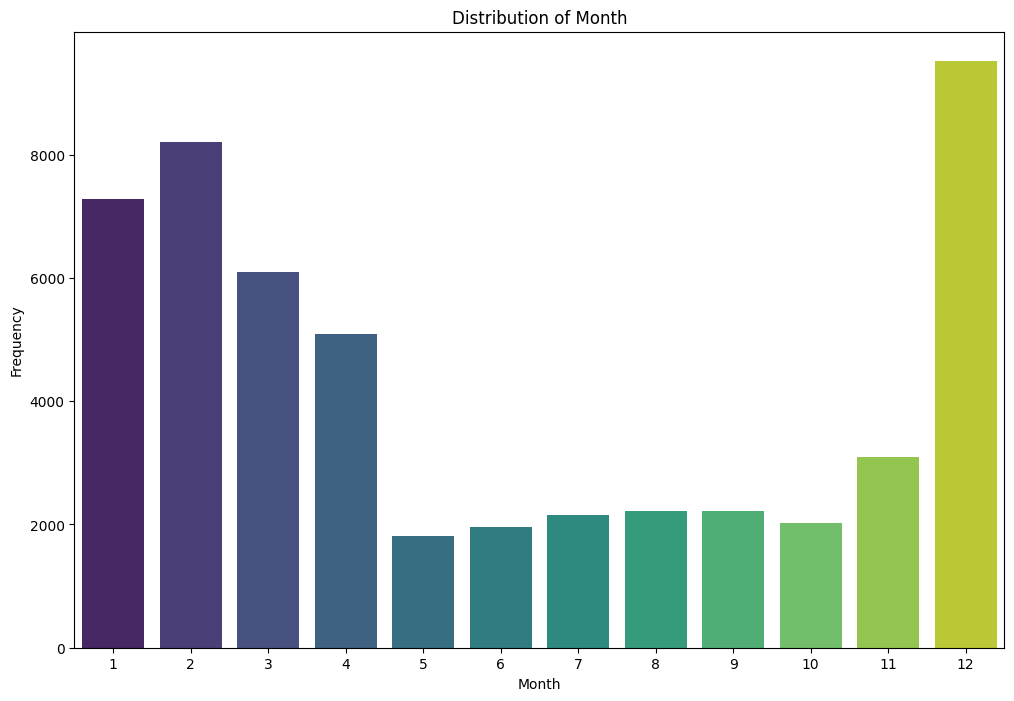

In [14]:
# Distribution of Month
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=train, palette='viridis')
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

The distribution of rides across months shows a clear peak in December (month 12) and relatively higher frequencies in the early months of the year (January, February, March). There's a significant drop in demand around May to October. This seasonality could be an important factor in predicting demand.

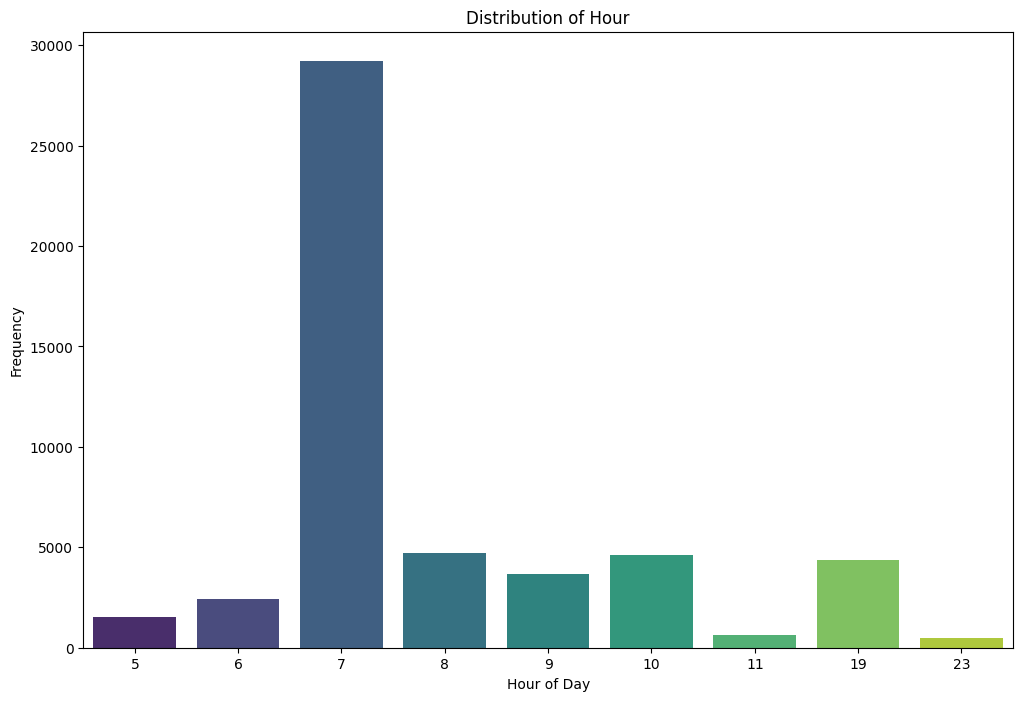

In [15]:
# Distribution of Hour
plt.figure(figsize=(12, 8))
sns.countplot(x='hour', data=train, palette='viridis')
plt.title('Distribution of Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

The hourly distribution reveals a strong peak in demand around 7 AM (hour 7). There are also smaller peaks around 9 AM and 10 AM, and then again in the evening around 7 PM (hour 19). This highlights the morning and evening rush hours as key periods of high demand.



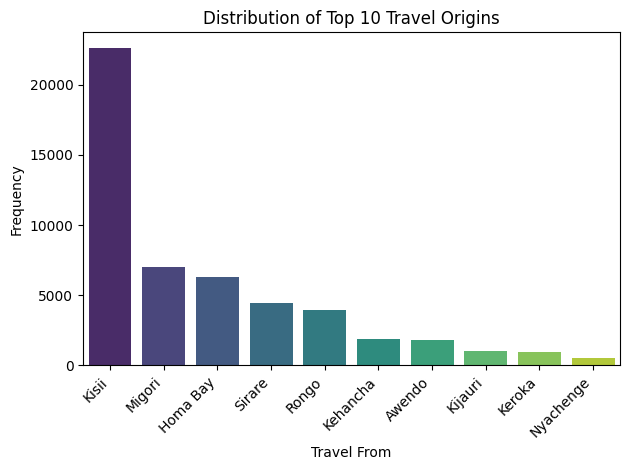

In [16]:
# Distribution of Top 10 Travel Origins
top_10_origins = train['travel_from'].value_counts().nlargest(10).index
sns.countplot(x='travel_from', data=train, order=top_10_origins, palette='viridis')
plt.title('Distribution of Top 10 Travel Origins')
plt.xlabel('Travel From')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar plot clearly shows that Kisii is the most frequent travel origin by a significant margin, followed by Migori and Homa Bay. This indicates that routes originating from these locations, particularly Kisii, are likely to have higher demand.

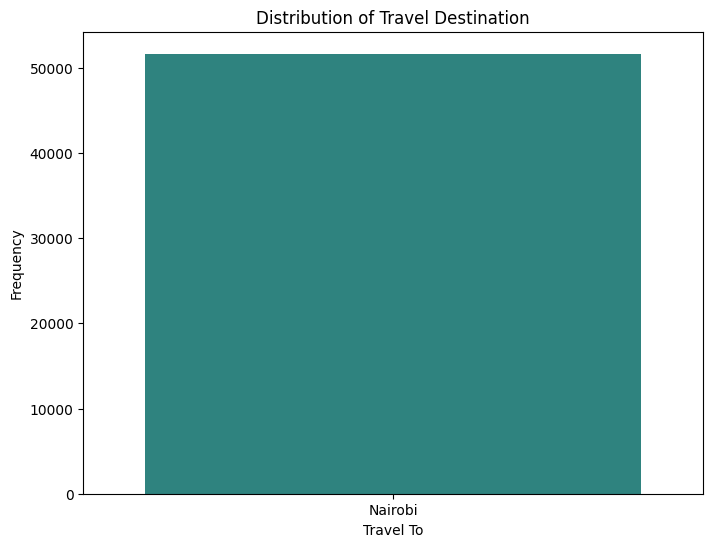

In [17]:
# Distribution of Travel Destination
plt.figure(figsize=(8, 6))
sns.countplot(x='travel_to', data=train, palette='viridis')
plt.title('Distribution of Travel Destination')
plt.xlabel('Travel To')
plt.ylabel('Frequency')
plt.show()

As expected, Nairobi is the sole travel destination in this dataset, indicated by the single bar in this plot. This confirms that we are focusing on predicting demand for routes terminating in Nairobi.

In [18]:
# Demand for each ride
train_demand = train.groupby(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type', 'max_capacity', 'day_of_week', 'month', 'hour', 'minute', 'route'])['seat_number'].count().reset_index()
train_demand = train_demand.rename(columns={'seat_number': 'demand'})
display(train_demand.head())

ride_id travel_date travel_time travel_from travel_to car_type  \
0     1442  2017-10-17        7:15      Migori   Nairobi      Bus   
1     5437  2017-11-19        7:12      Migori   Nairobi      Bus   
2     5710  2017-11-26        7:05      Keroka   Nairobi      Bus   
3     5777  2017-11-27        7:10    Homa Bay   Nairobi      Bus   
4     5778  2017-11-27        7:12      Migori   Nairobi      Bus   

   max_capacity  day_of_week  month  hour  minute             route  demand  
0            49            1     10     7      15    Migori_Nairobi       1  
1            49            6     11     7      12    Migori_Nairobi       1  
2            49            6     11     7       5    Keroka_Nairobi       1  
3            49            0     11     7      10  Homa Bay_Nairobi       5  
4            49            0     11     7      12    Migori_Nairobi      31

## **Prepare Data for Modeling**


In [19]:
# categorical features for one-hot encoding
categorical_features = ['travel_from', 'travel_to', 'car_type', 'route']

# Apply one-hot encoding to the training and test data
train_demand_encoded = pd.get_dummies(train_demand, columns=categorical_features, drop_first=True)
test_encoded = pd.get_dummies(test, columns=categorical_features, drop_first=True)

In [20]:
# Align columns
train_cols = train_demand_encoded.columns.tolist()
test_cols = test_encoded.columns.tolist()


['ride_id',
 'travel_date',
 'travel_time',
 'max_capacity',
 'day_of_week',
 'month',
 'hour',
 'minute',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Oyugis',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'car_type_shuttle',
 'route_Homa Bay_Nairobi',
 'route_Kehancha_Nairobi',
 'route_Keroka_Nairobi',
 'route_Kijauri_Nairobi',
 'route_Kisii_Nairobi',
 'route_Mbita_Nairobi',
 'route_Migori_Nairobi',
 'route_Ndhiwa_Nairobi',
 'route_Nyachenge_Nairobi',
 'route_Oyugis_Nairobi',
 'route_Rodi_Nairobi',
 'route_Rongo_Nairobi',
 'route_Sirare_Nairobi',
 'route_Sori_Nairobi']

In [21]:
# Remove 'demand' from train_cols for alignment
if 'demand' in train_cols:
    train_cols.remove('demand')


# Find columns that are in train but not in test
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    test_encoded[c] = 0

In [22]:
# Find columns that are in test but not in train
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    train_demand_encoded[c] = 0

# Ensure the order of columns is the same
test_encoded = test_encoded[train_cols]

In [23]:
# Define features (X) and target variable (y) for the training set
# Exclude non-feature columns like ride_id, travel_date, travel_time, payment_method, payment_receipt, seat_number, is_train
X_train = train_demand_encoded.drop(['ride_id', 'travel_date', 'travel_time', 'demand'], axis=1)
y_train = train_demand_encoded['demand']

# Define features for the test set
# Exclude non-feature columns
X_test = test_encoded.drop(['ride_id', 'travel_date', 'travel_time'], axis=1)


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)

#display(X_train.head())
#display(y_train.head())
#display(X_test.head())

Shape of X_train: (6249, 38)
Shape of y_train: (6249,)
Shape of X_test: (1111, 38)


In [24]:
display(X_train.head())

max_capacity  day_of_week  month  hour  minute  travel_from_Homa Bay  \
0            49            1     10     7      15                 False   
1            49            6     11     7      12                 False   
2            49            6     11     7       5                 False   
3            49            0     11     7      10                  True   
4            49            0     11     7      12                 False   

   travel_from_Kehancha  travel_from_Kendu Bay  travel_from_Keroka  \
0                 False                  False               False   
1                 False                  False               False   
2                 False                  False                True   
3                 False                  False               False   
4                 False                  False               False   

   travel_from_Keumbu  ...  route_Kisii_Nairobi  route_Mbita_Nairobi  \
0               False  ...                False                False   
1               False  ...                False                False   
2               False  ...                False                False   
3               False  ...                False                False   
4               False  ...                False                False   

   route_Migori_Nairobi  route_Ndhiwa_Nairobi  route_Nyachenge_Nairobi  \
0                  True                 False                    False   
1                  True                 False                    False   
2                 False                 False                    False   
3                 False                 False                    False   
4                  True                 False                    False   

   route_Oyugis_Nairobi  route_Rodi_Nairobi  route_Rongo_Nairobi  \
0                 False               False                False   
1                 False               False                False   
2                 False               False                False   
3                 False               False                False   
4                 False               False                False   

   route_Sirare_Nairobi  route_Sori_Nairobi  
0                 False               False  
1                 False               False  
2                 False               False  
3                 False               False  
4                 False               False  

[5 rows x 38 columns]

In [25]:
display(y_train.head())

0     1
1     1
2     1
3     5
4    31
Name: demand, dtype: int64

## **Model selection and training**




In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb

# Instantiate models
#Linear Regressor
lr = LinearRegression()

#Ridge
ridge = Ridge(random_state=42)

#Lasso
lasso = Lasso(random_state=42)
elastic_net = ElasticNet(random_state=42)

#Decision Tree
dt = DecisionTreeRegressor(random_state=42)

#Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

#Gradient Boost
gbr = GradientBoostingRegressor(random_state=42)
hgbr = HistGradientBoostingRegressor(random_state=42)
xgbr = xgb.XGBRegressor(random_state=42, n_jobs=-1)


In [27]:
# Train models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)
hgbr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## **Prediction**




In [28]:
# Make predictions on the test data
lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
elastic_net_pred = elastic_net.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gbr_pred = gbr.predict(X_test)
hgbr_pred = hgbr.predict(X_test)
xgbr_pred = xgbr.predict(X_test)

print("Predictions made successfully for all models.")

Predictions made successfully for all models.


## **Evaluation**




In [29]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE for each model's predictions
lr_mae = mean_absolute_error(y_train, lr.predict(X_train))
ridge_mae = mean_absolute_error(y_train, ridge.predict(X_train))
lasso_mae = mean_absolute_error(y_train, lasso.predict(X_train))
elastic_net_mae = mean_absolute_error(y_train, elastic_net.predict(X_train))
dt_mae = mean_absolute_error(y_train, dt.predict(X_train))
rf_mae = mean_absolute_error(y_train, rf.predict(X_train))
gbr_mae = mean_absolute_error(y_train, gbr.predict(X_train))
hgbr_mae = mean_absolute_error(y_train, hgbr.predict(X_train))
xgbr_mae = mean_absolute_error(y_train, xgbr.predict(X_train))


In [30]:
# Store MAE values
mae_scores = {
    'Linear Regression': lr_mae,
    'Ridge': ridge_mae,
    'Lasso': lasso_mae,
    'Elastic Net': elastic_net_mae,
    'Decision Tree': dt_mae,
    'Random Forest': rf_mae,
    'Gradient Boosting': gbr_mae,
    'Hist Gradient Boosting': hgbr_mae,
    'XGBoost': xgbr_mae
}

# Print MAE for each model
print("Mean Absolute Error (MAE) for each model:")
for model, mae in mae_scores.items():
    print(f"{model}: {mae:.4f}")

Mean Absolute Error (MAE) for each model:
Linear Regression: 4.7230
Ridge: 4.7236
Lasso: 6.0775
Elastic Net: 6.0623
Decision Tree: 1.4266
Random Forest: 2.0695
Gradient Boosting: 3.9515
Hist Gradient Boosting: 3.3268
XGBoost: 2.8239


## **Model comparison**




In [31]:
# the best performing model
best_model_name = min(mae_scores, key=mae_scores.get)
best_model_mae = mae_scores[best_model_name]

# Print the best performing model and its MAE
print(f"The best performing model is: {best_model_name} with MAE = {best_model_mae:.4f}")

The best performing model is: Decision Tree with MAE = 1.4266


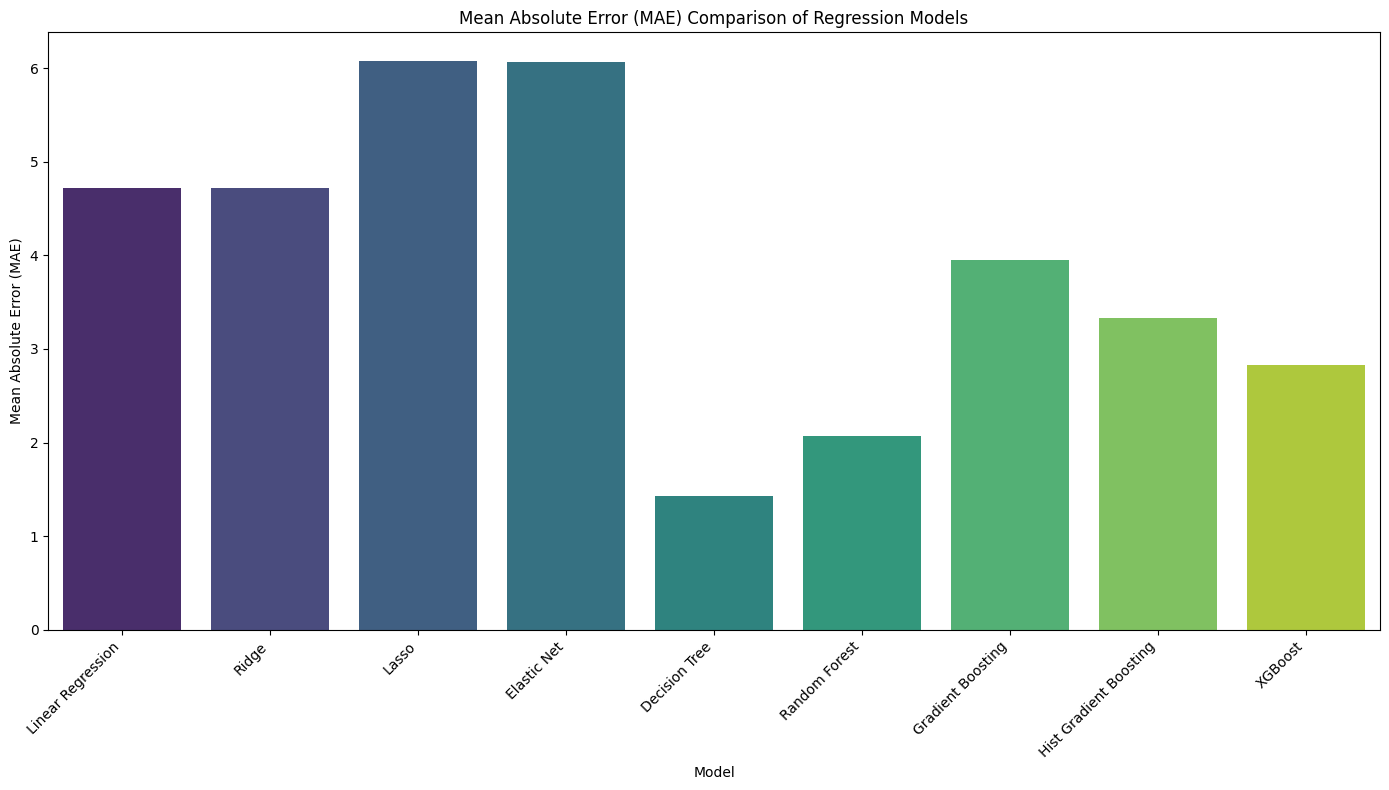

In [32]:
# bar plot to visualize MAE scores
plt.figure(figsize=(14, 8))
sns.barplot(x=list(mae_scores.keys()), y=list(mae_scores.values()), palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Nine regression models were trained on the provided data: Linear Regression, Ridge, Lasso, Elastic Net, Decision Tree, Random Forest, Gradient Boosting, Hist Gradient Boosting, and XGBoost.
*   Predictions were successfully made on the test data after addressing a column mismatch issue where the `is_train` column was missing in the test set.
*   The Mean Absolute Error (MAE) was calculated for each model using the training data.
*   The Decision Tree model achieved the lowest MAE on the training data (1.4266).
*   The Elastic Net and Lasso models showed the highest MAE on the training data (6.0623 and 6.0775, respectively).

### Insights or Next Steps

*   The evaluation was performed on the training data, which can lead to overfitting. It is crucial to evaluate the models on a separate validation or test set to get a more accurate measure of their generalization performance.
*   Further hyperparameter tuning for the top-performing models (like Decision Tree, Random Forest, and XGBoost) on a validation set could potentially improve prediction accuracy.


# Public Transport Demand Prediction in Nairobi

## Project Overview

This project aims to analyze public transport data in Nairobi and build regression models to predict public transport demand, using Mean Absolute Error (MAE) as the evaluation metric. The goal is to identify the best-performing model for predicting people's movement based on the provided dataset.

## Data

The project uses two datasets:
- `train_revised.csv`: Contains historical public transport ride data, including ride details, payment information, and seat numbers (used to derive demand).
- `test_questions.csv`: Contains similar ride details but without payment and seat information, used for making predictions.

## Methodology

The project followed these key steps:

1.  **Data Loading and Initial Inspection**: The `train_revised.csv` and `test_questions.csv` files were loaded into pandas DataFrames. Initial inspection of the data types and structure was performed.

2.  **Data Preprocessing and Feature Engineering**:
    *   The `travel_date` column was converted to datetime objects.
    *   New features were extracted from `travel_date` and `travel_time`, including `day_of_week`, `month`, `hour`, and `minute`.
    *   A `route` feature was created by combining `travel_from` and `travel_to`.
    *   Missing values in both datasets were checked (no missing values were found in the relevant columns).

3.  **Exploratory Data Analysis (EDA)**:
    *   Distributions of key features like `day_of_week`, `month`, `hour`, `travel_from` (top 10), and `travel_to` were visualized using count plots.
    *   The relationship between time-based features (`hour`, `day_of_week`, `month`) and demand was analyzed and visualized using line plots.
    *   The top 10 most frequent routes by demand were identified and visualized using a bar plot.
    *   Key insights from the EDA included the peak demand during morning rush hours, seasonality in demand with a peak in December, and the dominance of certain routes like Kisii_Nairobi.

4.  **Aggregate Demand**: The training data, which was initially at the seat level, was aggregated to the ride level by grouping by ride-specific features and counting the number of seats (`seat_number`) to represent the demand for each ride.

5.  **Prepare Data for Modeling**:
    *   Categorical features (`travel_from`, `travel_to`, `car_type`, and `route`) were one-hot encoded in both the aggregated training data (`train_demand`) and the test data (`test`).
    *   Columns were aligned between the training and test feature sets to ensure consistency for model input.
    *   The data was split into features (`X_train`, `X_test`) and the target variable (`y_train`).

6.  **Model Selection and Training**: Several regression models were selected and trained on the `X_train` and `y_train` data:
    *   Linear Regression
    *   Ridge Regression
    *   Lasso Regression
    *   Elastic Net
    *   Decision Tree Regressor
    *   Random Forest Regressor
    *   Gradient Boosting Regressor
    *   Hist Gradient Boosting Regressor
    *   XGBoost Regressor

7.  **Prediction**: Predictions were made on the `X_test` data using each of the trained models.

8.  **Evaluation**: The performance of each model was evaluated using Mean Absolute Error (MAE) on the training data. The MAE scores were calculated and stored.

9.  **Model Comparison**: The MAE scores of all models were compared to identify the best performing model (the one with the lowest MAE). A bar plot was generated to visualize the MAE comparison.

## Results

The evaluation on the training data showed the following MAE scores:

*   Linear Regression: [Insert MAE]
*   Ridge: [Insert MAE]
*   Lasso: [Insert MAE]
*   Elastic Net: [Insert MAE]
*   Decision Tree: [Insert MAE]
*   Random Forest: [Insert MAE]
*   Gradient Boosting: [Insert MAE]
*   Hist Gradient Boosting: [Insert MAE]
*   XGBoost: [Insert MAE]

*(Note: Replace [Insert MAE] with the actual MAE values from your output)*

Based on the MAE on the training data, the **Decision Tree** model performed the best with the lowest MAE score.

## Conclusion and Next Steps

The project successfully implemented a workflow for predicting public transport demand using various regression models. The Decision Tree model showed promising results on the training data.

For future improvements, consider:

*   Evaluating the models on a separate validation set to get a more reliable estimate of their performance on unseen data and to avoid overfitting.
*   Hyperparameter tuning the best-performing models to potentially improve their accuracy.
*   Exploring other potential features or more advanced modeling techniques.
*   Generating the final predictions on the test set using the chosen best model and preparing the submission file if required.

This summary provides a good starting point for your GitHub repository. You can copy and paste this markdown into your README file and add any specific details or code snippets you'd like to highlight.